In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11.ipynb")

# <a id='section_header'></a>E7: Lab Assignment 11 - Ordinary Differential Equations

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## Instructions

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question  | Points
:---      | --:
1.0 – 1.5 | 11
2.0 – 2.3 | 5
3.0 – 3.4 | 9
Total     | 25

**Run the cell below**, to import the required modules.

In [107]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import solve_ivp
np.seterr(all='ignore');
import time
!pip install -q IPythonDisplayFireworks

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Logistic Equation

The logistic equation is a simple differential equation model which can be used to relate the change in population $\dfrac{dP}{dt}$ to the current population, $P$.  

The logistic equation models bounded growth as opposed to earlier exponential growth models which fail to take into account constraints on the maximum population. These constraints arise from the fact that large populations will necessarily compete for resources (e.g. food, living space, etc.), while small populations are not generally constrained by these factors and can grow exponentially. The logistic equation reads

$$\dfrac{dP}{dt} = rP\left(1−\frac{P}{K}\right)$$
where
* $r$ is the growth rate in the absence of limited resources; i.e. how quickly the population would grow if infinite resources were available,
* $K$ is the carrying capacity, or the maximum population the ecosystem is able to sustain indefinitely.

The logistic equation can be used in a variety of other contexts, including machine learning, cancer treatment, economics and language adoption among others. While the interpretation of the parameters may change, the potential applications are all characterized by an exponential growth followed by a gradual saturation which the logistic equation is able to model. 

### Question 1.0: State Equation

Write a function `my_logistic_eq(t,P,r,K)` that returns $dP/dt$ based on the logistic equation above. You may assume that the arguments `t`, `P`, `r`, and `K` are all scalars, and represent the time, current population, growth rate and carrying capacity, respectively, as given in the above equation. 

We will later use the built-in `scipy.integrate.solve_ivp` function to integrate this ODE. This format allows `my_logistic_eq` to be used as an input argument to `solve_ivp` even though `t` is not part of the differential equation. ODEs which are not dependent on the time variable $t$ are known as *autonomous*.
 
Test your `my_logistic_eq(t,P,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_0`.
 
```PYTHON
Example: 
    
>>> my_logistic_eq(0,10,1.1,15)
3.666666666666667
```

In [108]:
# ANSWER CELL
# BEGIN SOLUTION
my_logistic_eq = lambda t,P,r,K: r*P*(1-P/K) 
# END SOLUTION

In [109]:
# TEST YOUR FUNCTION HERE
q1_0 = my_logistic_eq(0,10,1.1,15) # SOLUTION

print(f"P' = {q1_0}")

P' = 3.666666666666667


In [ ]:
grader.check("q1.0")

### Question 1.1: Forward (Explicit) Euler Method

Write a function `my_euler(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate, and carrying capacity, respectively, as given in the above equation

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Forward Euler method. The function should return two `numpy.array` objects. First, the discrete time grid and second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Test your new `my_euler(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_euler(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  19.595     ,  37.44693167,  68.18685557,
        113.57587097, 163.14513439, 193.50922901, 199.85215066,
        200.0013681 , 199.99998631, 200.00000014]))
```

In [114]:
# ANSWER CELL
# BEGIN SOLUTION
def my_euler(t_span,n,P0,r,K):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        Ps[i] = Ps[i-1] + dt*my_logistic_eq(t0,Ps[i-1],r,K)
    return ts,Ps
# END SOLUTION

In [115]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_1 = my_euler(t_span,n,P0,r,K) # SOLUTION

print(f'Time grid: {q1_1[0]}')
print(f'P(t):      {q1_1[1]}')

Time grid: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
P(t):      [ 10.          19.595       37.44693167  68.18685557 113.57587097
 163.14513439 193.50922901 199.85215066 200.0013681  199.99998631
 200.00000014]


In [ ]:
grader.check("q1.1")

### Question 1.2: Explicit Midpoint Method

Write a function `my_midpoint(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equation

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the explicit midpoint method. The function should return two `numpy.array` objects. First, the discrete time grid and second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Test your new `my_midpoint(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_midpoint(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.83969667,  52.63667777,  99.24011848,
        146.71166129, 174.91141658, 188.06871901, 194.19856402,
        197.14067754, 198.58063224, 199.29285385]))
```

In [120]:
# ANSWER CELL
# BEGIN SOLUTION
def my_midpoint(t_span,n,P0,r,K):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        k1 = (dt/2)*my_logistic_eq(t0,Ps[i-1],r,K)
        Ps[i] = Ps[i-1] + dt*my_logistic_eq(t0,Ps[i-1]+k1,r,K)
    return ts,Ps
# END SOLUTION

In [121]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_2 = my_midpoint(t_span,n,P0,r,K) # SOLUTION

print(f'Time grid: {q1_2[0]}')
print(f'P(t):      {q1_2[1]}')

Time grid: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
P(t):      [ 10.          23.83969667  52.63667777  99.24011848 146.71166129
 174.91141658 188.06871901 194.19856402 197.14067754 198.58063224
 199.29285385]


In [ ]:
grader.check("q1.2")

### Question 1.3: Heun's Method

Write a function `my_heun(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equation

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using Heun's method. The function should return two `numpy.array` objects. First, the discrete time grid and second, the numerical solution for $P(t)$ evaluated on the time grid. Both arrays should have shape `(n+1,)`.

Test your new `my_heun(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_3`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_heun(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  23.72346584,  51.85066975,  96.27574153,
        141.23262852, 169.98341755, 184.96735326, 192.48615188,
        196.24401448, 198.12217279, 199.06108154]))
```

In [126]:
# ANSWER CELL
# BEGIN SOLUTION
def my_heun(t_span,n,P0,r,K):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    Ps = np.zeros((n+1,))
    Ps[0] = P0
    for i in range(1,n+1):
        k1 = dt*my_logistic_eq(t0,Ps[i-1],r,K)
        Ps[i] = Ps[i-1] + (dt/2)*(my_logistic_eq(t0,Ps[i-1],r,K) + my_logistic_eq(t0,Ps[i-1]+k1,r,K))
    return ts,Ps
# END SOLUTION

In [127]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_3 = my_heun(t_span,n,P0,r,K) # SOLUTION

print(f'Time grid: {q1_3[0]}')
print(f'P(t):      {q1_3[1]}')

Time grid: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
P(t):      [ 10.          23.72346584  51.85066975  96.27574153 141.23262852
 169.98341755 184.96735326 192.48615188 196.24401448 198.12217279
 199.06108154]


In [ ]:
grader.check("q1.3")

### Question 1.4: SciPy Solver

Write a function `my_ivp(t_span,n,P0,r,K)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `P0`, `r`, and `K` are all scalars, and represent the initial population, growth rate and carrying capacity, respectively, as given in the above equations

Your function should solve the logistic equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the built-in `scipy.integrate.solve_ivp` function. Refer to the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html). You will have to pass the function to be integrated, the time span and the initial condition to `solve_ivp`. For this problem, you will also have to specify the `t_eval` argument which tells the solver the points at which the solution is desired. If left blank, `solve_ivp` will choose these points for you. 

Your `my_ivp` function should return two `numpy.array` objects. First, the discrete time grid an, second, the numerical solution for $P(t)$ evaluated on the time grid.  Both arrays should have shape `(n+1,)`.

*Hint: The main arguments you want to pass are: `scipy.integrate.solve_ivp(fun=..., t_span=..., y0=..., t_eval=..., args=(...))`*

*Note that the initial value, `y0`, should be array like, even if it is a single scalar value. In addition, `args` should be a tuple that includes additional arguments to pass to the user-defined function, `fun`, besides the independent variable and the unknown function we're trying to solve for.*

Test your new `my_ivp(t_span,n,P0,r,K)` function for the example below and make sure it produces the correct output. Assign the result to `q1_4`.
 
```PYTHON
Examples: 
    
>>> t_span = [0, 10] 
>>> n = 10 
>>> P0 = 10 
>>> r = 1.01 
>>> K = 200 
>>> my_ivp(t_span,n,P0,r,K) 

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([ 10.        ,  25.25417705,  56.82447686, 104.36572878,
        149.93249826, 178.34074735, 191.54722911, 196.85380604,
        198.82277579, 199.58873589, 199.8247388 ]))
```

In [132]:
# ANSWER CELL
# BEGIN SOLUTION
def my_ivp(t_span,n,P0,r,K):
    sol = solve_ivp(my_logistic_eq, t_span, [P0], args=(r,K), t_eval=np.linspace(t_span[0],t_span[1],n+1))
    return sol.t, sol.y[0] lol
# END SOLUTION

In [133]:
# TEST YOUR FUNCTION HERE
t_span = [0, 10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_4 = my_ivp(t_span,n,P0,r,K) # SOLUTION

print(f'Time grid: {q1_4[0]}')
print(f'P(t):      {q1_4[1]}')

Time grid: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
P(t):      [ 10.          25.25417705  56.82447686 104.36572878 149.93249826
 178.34074735 191.54722911 196.85380604 198.82277579 199.58873589
 199.8247388 ]


In [ ]:
grader.check("q1.4")

### Question 1.5: Analytic Solution

The logistic equation has an analytic solution given by

$$P(t)= \frac{KP_0e^{rt}}{K+P_0(e^{rt}−1)}$$

where $P_0$ is the initial population. This curve belongs to the family of *logistic functions*, hence the name of the equation. 

Write a function `my_logistic_plot(t_span,n,P0,r,K)` which returns a `matplotlib.pyplot` figure of the exact solution and the four numerical solutions. The function inputs are the same as in the previous parts.

The function should create the figure as follows:
* Line plot (1) time vs. population as computed by `my_euler` given the input parameters
* Line plot (2) time vs. population as computed by `my_midpoint` given the input parameters
* Line plot (3) time vs. population as computed by `my_heun` given the input parameters
* Line plot (4) time vs. population as computed by `my_ivp` given the input parameters
* Line plot (5) time vs. population as given by the exact solution on an equally spaced time grid of 10,001 points spanning `t_span`
* A legend with labels 'Forward Euler', 'Midpoint', 'Heun', 'solve_ivp' and 'Exact' for line plots 1-5, respectively
* X axis label which reads 'Time, year'
* Y axis label which reads 'Population'
* Title label which reads 'n = {n}', where {n} is replaced with `n`
* X-axis limits equal to `t_span`
* Y-axis limits equal to `[0,K]`

Test your function for the two examples below. Assign the result to `q1_5`. Your output figures should look like Figures 1 and 2 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

 
```PYTHON
Examples: 
>>> t_span = [0,10]
>>> P0 = 10
>>> r = 1.01
>>> K = 200
>>> n = 10
>>> my_logistic_plot(t_span,n,P0,r,K)
```
<center><img src="resources/lab11_q1_5_1.png" style="width:600px;"/>
<figcaption style="text-align:center"> Figure 1. Question 1.5, Example 1</figcaption></center> 

```PYTHON
>>> n = 1000
>>> my_logistic_plot(t_span,n,P0,r,K)
```
<center><img src="resources/lab11_q1_5_2.png" style="width:600px;"/>
<figcaption style="text-align:center"> Figure 2. Question 1.5, Example 2 </figcaption></center> 

In [138]:
# ANSWER CELL
# BEGIN SOLUTION
def my_logistic_plot(t_span,n,P0,r,K):
    # Forward Euler
    ts_euler, Ps_euler = my_euler(t_span,n,P0,r,K)
    # Midpoint
    ts_mid, Ps_mid = my_midpoint(t_span,n,P0,r,K)
    # Heun
    ts_heun, Ps_heun = my_heun(t_span,n,P0,r,K)
    # solve_ivp
    ts_ivp, Ps_ivp = my_ivp(t_span,n,P0,r,K)
    # Exact solution
    ts_exact = np.linspace(t_span[0],t_span[1],10001)
    Ps_exact = K*P0*np.exp(r*ts_exact)/(K+P0*(np.exp(r*ts_exact)-1))
    # Create figure
    fig = plt.figure()
    # Plot solutions
    plt.plot(ts_euler, Ps_euler, label = 'Forward Euler')
    plt.plot(ts_mid, Ps_mid, label = 'Midpoint')
    plt.plot(ts_heun, Ps_heun, label = 'Heun')
    plt.plot(ts_ivp, Ps_ivp, label = 'solve_ivp')
    plt.plot(ts_exact, Ps_exact, label = 'Exact')
    # Labels
    plt.xlabel('Time, year')
    plt.ylabel('Population')
    # Title
    plt.title(f'n = {n}')
    # Limits
    plt.xlim(t_span)
    plt.ylim([0,K])
    # Legend
    plt.legend()
    # Grid
    plt.grid()
    return fig
# END SOLUTION

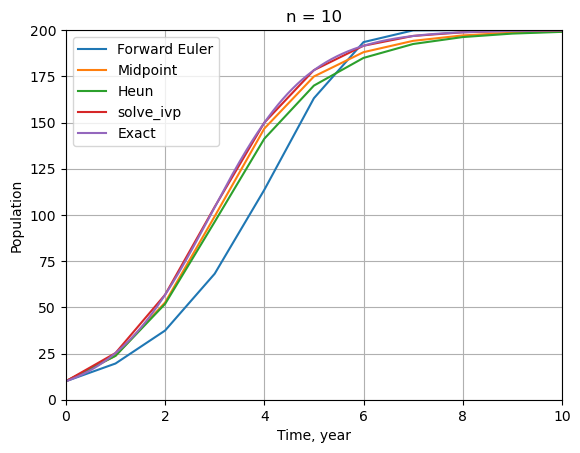

In [139]:
# TEST YOUR FUNCTION HERE
t_span = [0,10] # SOLUTION NO PROMPT
P0 = 10 # SOLUTION NO PROMPT
r = 1.01 # SOLUTION NO PROMPT
K = 200 # SOLUTION NO PROMPT
n = 10 # SOLUTION NO PROMPT
q1_5 = my_logistic_plot(t_span,n,P0,r,K) # SOLUTION

In [ ]:
grader.check("q1.5")

## Question 2: Lorenz System

The Lorenz system is a system of ordinary differential equations that was originally developed to model convection currents in the atmosphere. The Lorenz equations can be written as

\begin{align}
\dot{x} &= \sigma(y-x) \\
\dot{y} &= x(\rho - z) - y \\
\dot{z} &= xy - \beta z 
\end{align}

where $x$, $y$, and $z$ represent position in three dimensions and $\sigma$, $\rho$, and $\beta$ are scalar parameters of the system. You can read more about the Lorenz system [here](https://en.wikipedia.org/wiki/Lorenz_system).

<center><img src="https://aescripts.com/media/catalog/product/c/o/comp_1_5.gif" style="width:500px;"/>
<figcaption style="text-align:center"> Figure 3. A solution in the Lorenz attractor shown using a 2D-projection.</figcaption></center> 

### Question 2.0: State Equation

As evident in the equations above, the Lorenz system is a system of three first-order ordinary differential equations, where we have to solve for all three equations simultaneously.

Let $S$ denote the state of the system such that 

$$ S = \begin{bmatrix} x \\ y \\z \end{bmatrix}$$

Write a function `my_lorenz(t,S,sigma,rho,beta)`, where `t` is a scalar denoting time, `S` is a `(3,)` array denoting the state , i.e. the position $(x,y,z)$, and `sigma`, `rho`, and `beta` are strictly positive scalars representing $\sigma$, $\rho$, and $\beta$, respectively. Recall that just like in Question 1, the input argument `t` is obligatory if `my_lorenz` is to be used as an input argument to `solve_ivp`, even though it is not part of the differential equation. Your function should return the time derivative, $\dot{S}$, as an array with the same size as `S`. The equations for $\dot{S}$ are given above.

Test your `my_lorenz(t,S,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q2_0`.
 
```PYTHON
Examples: 
    
>>> my_lorenz(0,np.array([1, 2, 3]), 10, 28, 8/3)
array([10., 23., -6.])
```

In [147]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz(t, S, sigma, rho, beta):
    u = sigma*(S[1] - S[0])
    v = S[0]*(rho - S[2]) - S[1]
    w =  S[0]*S[1] - beta*S[2]
    return np.array([u,v,w])
# END SOLUTION

In [148]:
# TEST YOUR FUNCTION HERE
q2_0 = my_lorenz(0,np.array([1, 2, 3]), 10, 28, 8/3) # SOLUTION

print(f"S' = {q2_0}")

S' = [10. 23. -6.]


In [ ]:
grader.check("q2.0")

### Question 2.1: Fourth Order Runge-Kutta Method (RK4)

Write a function `my_lorenz_RK4(t_span,n,S0,sigma,rho,beta)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `S0` is a `numpy.array` of shape `(3,)` denoting the initial state of the Lorenz system
* `sigma`, `rho`, and `beta` are the scalar parameters $\sigma$, $\rho$, and $\beta$, respectively, of the Lorenz system

Note that in this case, there are three initial conditions, the positions $x, y, z$ at $t_0$:

$$ S_0 = \begin{bmatrix} x_0 \\ {y}_0 \\ {z_0}\end{bmatrix}$$

Your function should solve the Lorenz equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the [fourth order Runge-Kutta method](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.05-Predictor-Corrector-Methods.html#fourth-order-runge-kutta-method):

$$
\begin{eqnarray*}
k_1 & = & F(t_i,S(t_i)) = \begin{bmatrix} \dot{x_i} \\ \dot{y_i} \\\dot{z_i} \end{bmatrix}\\
k_2 & = & F\left(t_i+\frac{h}{2},S(t_i)+\frac{1}{2}k_1h\right) \\
k_3 & = & F\left(t_i+\frac{h}{2},S(t_i)+\frac{1}{2}k_2h\right)\\
k_4 & = & F\left(t_i+h,S(t_i)+k_3h\right)
\end{eqnarray*}
$$

The solution is then computed as:

$$
S(t_{i+1}) = S(t_i) + \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)
$$

or in matrix form:

$$ \begin{bmatrix} x_{i+1} \\ {y}_{i+1} \\ {z_{i+1}}\end{bmatrix} = \begin{bmatrix} x_{i} \\ {y}_{i} \\ {z_{i}}\end{bmatrix}+ \frac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4\right)$$

*Note that in the above equations, $F(t, S(t))$ represents your function `my_lorenz(t,S,sigma,rho,beta)`. So you have to call your function `my_lorenz` four times to compute $k_1, k_2, k_3, k_4$, each time passing different arguments for `S` based on the equations above. In addition, you can always use `t=t0` when calling `my_lorenz` in this case, because as mentioned previously, the function does not depend on the values of `t`.*

Your `my_lorenz_RK4` function should return four `numpy.array` objects in the following order:
* the discrete time grid
* the numerical solution for $x$ evaluated on the time grid
* the numerical solution for $y$ evaluated on the time grid
* the numerical solution for $z$ evaluated on the time grid

All four arrays should have size `(n+1,)`.

Test your new `my_lorenz_RK4(t_span,n,S0,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q2_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,50]
>>> n = 10000
>>> S0 = np.array([0, 1, 1.05])
>>> sigma = 10
>>> rho = 28
>>> beta = 8/3
>>> my_lorenz_RK4(t_span,n,S0,sigma,rho,beta)

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([0.        , 0.04870245, 0.09510639, ..., 0.48781901, 0.49868598,
        0.51060243]),
 array([1.        , 0.99831774, 1.00303716, ..., 0.69467581, 0.72651049,
        0.75945225]),
 array([ 1.05      ,  1.03621498,  1.02284888, ..., 13.73960145,
        13.55936328, 13.38163371]))
```

In [152]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz_RK4(t_span,n,S0,sigma,rho,beta):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    S = np.zeros((3,n+1))
    S[:,0] = S0
    for i in range(1,n+1):
        k1 = my_lorenz(t0, S[:,i-1], sigma, rho, beta)
        k2 = my_lorenz(t0, S[:,i-1] + (dt/2)*k1, sigma, rho, beta)
        k3 = my_lorenz(t0, S[:,i-1] + (dt/2)*k2, sigma, rho, beta)
        k4 = my_lorenz(t0, S[:,i-1] + dt*k3, sigma, rho, beta)
        S[:,i] =  S[:,i-1] + (dt/6)*(k1+2*k2+2*k3+k4)
        
    return ts,S[0,:],S[1,:],S[2,:]
# END SOLUTION

In [153]:
# TEST YOUR FUNCTION HERE
t_span = [0,50] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
s0 = np.array([0, 1, 1.05]) # SOLUTION NO PROMPT
sigma = 10 # SOLUTION NO PROMPT
rho = 28 # SOLUTION NO PROMPT
beta = 8/3 # SOLUTION NO PROMPT
q2_1 = my_lorenz_RK4(t_span,n,s0,sigma,rho,beta) # SOLUTION 

print(f't:     {q2_1[0]}')
print(f'x(t):  {q2_1[1]}')
print(f'y(t):  {q2_1[2]}')
print(f'z(t):  {q2_1[3]}')

t:     [0.0000e+00 5.0000e-03 1.0000e-02 ... 4.9990e+01 4.9995e+01 5.0000e+01]
x(t):  [0.         0.04870245 0.09510639 ... 0.48781901 0.49868598 0.51060243]
y(t):  [1.         0.99831774 1.00303716 ... 0.69467581 0.72651049 0.75945225]
z(t):  [ 1.05        1.03621498  1.02284888 ... 13.73960145 13.55936328
 13.38163371]


In [ ]:
grader.check("q2.1")

### Question 2.2: SciPy Solver

Write a function `my_lorenz_ivp(t_span,n,S0,sigma,rho,beta)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `S0` is a `numpy.array` of shape `(3,)` denoting the initial state of the Lorenz system
* `sigma`, `rho`, and `beta` are the scalar parameters $\sigma$, $\rho$, and $\beta$, respectively, of the Lorenz system

Your function should solve the Lorenz equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the built-in `scipy.integrate.solve_ivp` function. 

Your `my_lorenz_ivp` function should return four `numpy.array` objects in the following order:
* the discrete time grid
* the numerical solution for $x$ evaluated on the time grid
* the numerical solution for $y$ evaluated on the time grid
* the numerical solution for $z$ evaluated on the time grid

All four arrays should have size `(n+1,)`.

Test your new `my_lorenz_ivp(t_span,n,S0,sigma,rho,beta)` function for the example below and make sure it produces the correct output. Assign the result to `q2_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,50]
>>> n = 10000
>>> S0 = np.array([0, 1, 1.05])
>>> sigma = 10
>>> rho = 28
>>> beta = 8/3
>>> my_lorenz_ivp(t_span,n,S0,sigma,rho,beta)

(array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 4.9990e+01, 4.9995e+01,
        5.0000e+01]),
 array([ 0.        ,  0.04870278,  0.09510677, ..., -6.47711257,
        -5.91836451, -5.37778722]),
 array([1.        , 0.99831735, 1.00303671, ..., 4.87306536, 5.07875421,
        5.24624053]),
 array([ 1.05      ,  1.03621495,  1.02284887, ..., 35.80640543,
        35.17867304, 34.56786129]))
```

In [161]:
# ANSWER CELL
# BEGIN SOLUTION
def my_lorenz_ivp(t_span,n,S0,sigma,rho,beta):
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    sol = solve_ivp(my_lorenz,t_span,S0,args=(sigma, rho, beta),t_eval=ts)
    return sol.t, sol.y[0,:], sol.y[1,:], sol.y[2,:]
# END SOLUTION

In [162]:
# TEST YOUR FUNCTION HERE
t_span = [0,50] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
s0 = np.array([0, 1, 1.05]) # SOLUTION NO PROMPT
sigma = 10 # SOLUTION NO PROMPT
rho = 28 # SOLUTION NO PROMPT
beta = 8/3 # SOLUTION NO PROMPT
q2_2 = my_lorenz_ivp(t_span,n,s0,sigma,rho,beta) # SOLUTION 

print(f't:     {q2_2[0]}')
print(f'x(t):  {q2_2[1]}')
print(f'y(t):  {q2_2[2]}')
print(f'z(t):  {q2_2[3]}')

t:     [0.0000e+00 5.0000e-03 1.0000e-02 ... 4.9990e+01 4.9995e+01 5.0000e+01]
x(t):  [ 0.          0.04870278  0.09510677 ... -6.47711257 -5.91836451
 -5.37778722]
y(t):  [1.         0.99831735 1.00303671 ... 4.87306536 5.07875421 5.24624053]
z(t):  [ 1.05        1.03621495  1.02284887 ... 35.80640543 35.17867304
 34.56786129]


In [ ]:
grader.check("q2.2")

### Question 2.3: Further Exploration (Optional) 

The popular term *butterfly effect* in chaos theory stems from the solution of a Lorentz system and describes the sensitivity of a system to the choice of initial conditions. A very small change in the initial conditions or the system parameters can result in a large difference in the solution, hence it is a chaotic system. 

Use the cell below which creates a simple plot of the solution as a starting point. In this section, you are free to experiment and explore this phenomena. Adjust and modify the parameters, compare different solutions, try to recreate some of the beautiful images online or anything else you find interesting.


This section will not be graded.

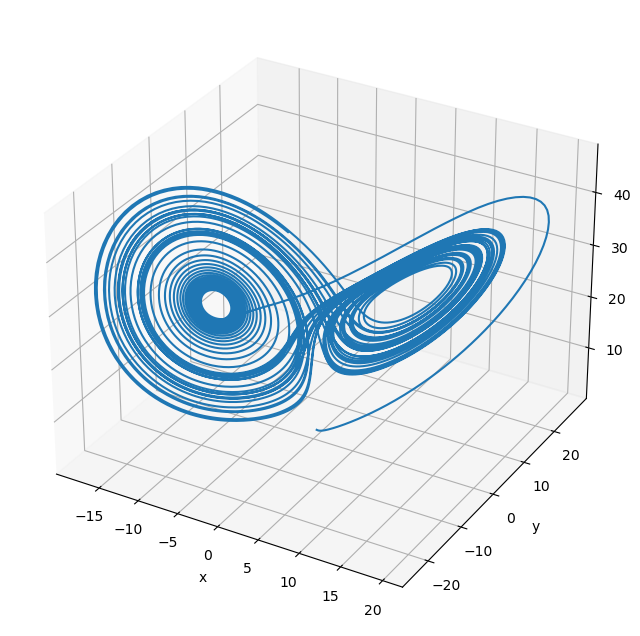

In [170]:
# ANSWER CELL
from mpl_toolkits import mplot3d

t_span = [0,50]
n = 10000 
s0 = np.array([0, 1, 1.05])
sigma = 10 
rho = 28 
beta = 8/3 
t,x,y,z = my_lorenz_ivp(t_span,n,s0,sigma,rho,beta) 

# Create figure
fig = plt.figure(figsize=(8,8))
# 3d axes
ax = plt.axes(projection='3d')
# Plot
ax.plot3D(x,y,z)
# Set axes labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Add grid
ax.grid()
plt.show()

<div class="alert alert-block alert-warning"> <b>NOTE!</b> The rest of the lab focuses on solving higher-order ODEs. If we haven't covered this topic yet and you have no prior experience with it, please wait until after the next lecture to continue the assignment. </div>

## Question 3: Damped Harmonic Oscillator

Consider the model of a mass-spring-damper (MSD) system in one dimension as shown in Figure 4. In this figure, $m$ denotes the mass of the block, $c$ is the damping coefficient, and $k$ is the spring stiffness. 

<br>
<center><figure>
    <table><tr>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/1920px-Mass_spring_damper.svg.png" style="width:500px;"/>
        <br>
      </p> 
    </td>
    <td style="vertical-align:center"> 
      <p align="center" >
        <img src="https://www.mathworks.com/academia/courseware/mass-spring-damper-systems/_jcr_content/mainParsys/columns/82e3f256-717d-49de-8625-1dcda41e71ba/columns_copy/1/image.adapt.full.medium.png/1705913594167.png" style="width:200px%">
        <br>
      </p> 
    </td>
    </tr></table>
    <figcaption style="text-align:center">Figure 4. Mass-spring-damper system.</figcaption>  
</figure></center>

A damper is a mechanism which dissipates energy in the system by resisting velocity. The MSD system is a simplistic model of several engineering applications such as shock absorbers and structural systems. The relationship between the acceleration $\ddot{x}$, velocity $\dot{x}$, and displacement $x$ can be expressed by the following mass-spring-damper (MSD) differential equation

$$ m\ddot{x} + c\dot{x} +  kx = 0$$

### Question 3.0: Reduction of Order

It should be evident that the motion of a MSD system is modeled using a higher-order differential equation. To solve for $x$, we have to reduce this equation to a system of first-order differential equations. Refer to the lecture notes for more details.

**First,** rearrange the ODE such that the highest-order derivative is on one side and everything else is on the other side

**Second,** let the state of the system be denoted by the vector 

$$ S = \begin{bmatrix} x \\ v \end{bmatrix} = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}= \begin{bmatrix} S_1 \\ S_2 \end{bmatrix}$$

where $x$ is the displacement of the mass from its resting configuration and $v$  is its velocity, which is simply the derivative of the displacement

**Third,** take the derivative of $S$ and rewrite it as a system of first-order differential equations. You should obtain the following equation for $\dot{S}$:

$$\dot{S}= \begin{bmatrix} \dot{x} \\ \ddot{x} \end{bmatrix}= \begin{bmatrix} S_2 \\ \dfrac{-(cS_2 +  kS_1)}{m} \end{bmatrix}$$

*Note that on the exam, the equation of $\dot{S}$ will not be provided and you have to derive it. So make sure you practice this and are able to get the above equation on your own.*

To simplify the numerical solution, we need to transform the above system to matrix form, and find the matrix $A$ such that

$$\dot{S}=  A \times S = \begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix} \begin{bmatrix} S_1 \\ S_2 \end{bmatrix} = \begin{bmatrix} S_2 \\ \dfrac{-(cS_2 +  kS_1)}{m} \end{bmatrix}$$

where $A$ is some linear operator (matrix). Note that $A$ should be independent of $S$ and $t$. Although, this might not look simpler, the matrix $A$ will be extremely useful for solving the MSD equation using several numerical methods.

Write a function `my_msd(m,c,k)` where `m`, `c`, and `k` are the mass, damping, and stiffness coefficients of the MSD equation, respectively. Your function should return the matrix $A$ which maps $S$ to $\dot{S}$ as a `numpy.array` of shape `(2,2)`. Note that $A$ sould be a `numpy.array`.

*Hint: You will have to derive the values of matrix $A$ by hand and then write the function below that returns it. Solve for $a_{11}, a_{12}, a_{21}, a_{22}$ that satisfy the matrix multiplication shown above.*

Test your `my_msd(m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q3_0`.
 
```PYTHON
Example: 
    
>>> my_msd(10, 1, 100)

array([[  0. ,   1. ],
       [-10. ,  -0.1]])
```

In [171]:
# ANSWER CELL
# BEGIN SOLUTION
my_msd = lambda m,c,k: np.array([[0, 1], [-k/m, -c/m]]) 
# END SOLUTION

In [172]:
# TEST YOUR FUNCTION HERE
q3_0 =  my_msd(10, 1, 100) # SOLUTION

print(f'A = \n {q3_0}')

A = 
 [[  0.    1. ]
 [-10.   -0.1]]


In [ ]:
grader.check("q3.0")

### Question 3.1: Forward Euler

We will next solve this second-order ODE using forward Euler's method (which is simply Euler's method that we discussed in the lecture). We will next see a modification of this method, known as Backward Euler's Method.

Write a function `my_forward_euler(t_span,n,S0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `S0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Note that since this is a second order differential equation (highest order derivative that appears in the equation is the second order, $\ddot{x}$), then there are two initial conditions, the position $x$ at $t_0$ and the velocity $\dot{x}$ at $t_0$:

$$ S_0 = \begin{bmatrix} x_0 \\ \dot{x}_0 \end{bmatrix}$$

Your function should solve the MSD equation on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Forward (or explicit) Euler method. 

The Forward Euler solution for time $t_{i+1}$ is given in matrix form as

$$
\begin{bmatrix} x_{i+1} \\ \dot{x}_{i+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} + h\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)\begin{bmatrix} x_{i} \\ \dot{x}_{i} \end{bmatrix} \\
$$

which can be used to solve for the displacement and velocity at time step $t_{i+1}$ using the values at time step $t_i$.

Your `my_forward_euler` function should return three `numpy.array` objects in the following order:
* the discrete time grid,
* the numerical solution for $x$ evaluated on the time grid,
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`. 

*Hints:*
* To perform matrix-vector or matrix-matrix multiplication, use the `@` operator which is the equivalent of MATLAB's `*`. Refer to some other differences between `numpy` and MATLAB in the context of linear algebra [here](https://numpy.org/devdocs/user/numpy-for-matlab-users.html#linear-algebra-equivalents). 
* Identity matrices can be generated with [`numpy.eye(N)`](https://numpy.org/devdocs/reference/generated/numpy.eye.html), where `N` is the number of rows.

Test your `my_forward_euler(t_span,n,S0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q3_1`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> S0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_forward_euler(t_span,n,S0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 1.        , 0.9996    , ..., 0.18033913, 0.17410351,
        0.16781135]),
 array([ 0.        , -0.08      , -0.1598    , ..., -1.24712288,
        -1.25843221, -1.26921441]))
```

In [176]:
# ANSWER CELL
# BEGIN SOLUTION
def my_forward_euler(t_span,n,s0,m,c,k):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = s0
    
    A = my_msd(m,c,k)
    B = np.eye(2) + dt*A 
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [177]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q3_1 = my_forward_euler(t_span,n,s0,m,c,k) # SOLUTION

print(f't:     {q3_1[0]}')
print(f'x(t):  {q3_1[1]}')
print(f'v(t):  {q3_1[2]}')

t:     [0.    0.005 0.01  ... 4.99  4.995 5.   ]
x(t):  [1.         1.         0.9996     ... 0.18033913 0.17410351 0.16781135]
v(t):  [ 0.         -0.08       -0.1598     ... -1.24712288 -1.25843221
 -1.26921441]


In [ ]:
grader.check("q3.1")

Next, you will explore two additional methods that we did not cover in lecture: Backward Euler and Trapezoid Rule. For both methods, you should be able to simply copy your code from Question 3.1. and make very minor modifications based on the equation of each approach. Do not forget to update the function name!

### Question 3.2: Backward Euler

Another approach that could be used is Backward Euler. It is similar to the (standard) Euler method, but differs in that it is an implicit method. Explicit methods (like Forward Euler) calculate the state of a system at a later time from the state of the system at the current time (i.e., by taking a step forward), while implicit methods find a solution by solving an equation involving both the current state of the system and the later one.

Write a function `my_backward_euler(t_span,n,S0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `S0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Your function should solve the MSD equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the Backward (or implicit) Euler method. 

The Backward Euler solution for time $t_{i+1}$ is given in matrix form as

$$
\begin{bmatrix} x_{i+1} \\ \dot{x}_{i+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - h\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)^{-1}\begin{bmatrix} x_{i} \\ \dot{x}_{i} \end{bmatrix} \\
$$


Your `my_backward_euler` function should return three `numpy.array` objects in the following order:
* the discrete time grid
* the numerical solution for $x$ evaluated on the time grid
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`.

*Hint:* To compute a matrix inverse, you may wish to use [`numpy.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html). Alternatively, instead of inverting a matrix, you may solve a system of linear equations at each step which can be done with [`numpy.linalg.solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). As discussed in lecture, performing a matrix inversion followed by a matrix multiplication is in general less stable than solving a system of equations directly. However, for this problem, the former approach has the added advantage that the matrix inversion needs to be performed only once. Thus, there is a trade-off to be considered between numerical stability and efficiency. For this problem, you may compute the solution however you prefer.

***Note that you should be able to simply copy your code from Question 3.1. and make very minor modifications based on the equation of this approach, which is presented above. Do not forget to update the function name!***

Test your new `my_backward_euler(t_span,n,S0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q3_2`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> S0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_backward_euler(t_span,n,S0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99960116, 0.99880478, ..., 0.13130241, 0.12717841,
        0.1230156 ]),
 array([ 0.        , -0.07976867, -0.15927487, ..., -0.8166888 ,
        -0.82480107, -0.83256092]))
```

In [184]:
# ANSWER CELL
# BEGIN SOLUTION
def my_backward_euler(t_span,n,S0,m,c,k):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = S0
    
    A = my_msd(m,c,k)
    B = np.linalg.inv(np.eye(2)-dt*A)
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [185]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q3_2 = my_backward_euler(t_span,n,s0,m,c,k) # SOLUTION

print(f't:     {q3_2[0]}')
print(f'x(t):  {q3_2[1]}')
print(f'v(t):  {q3_2[2]}')

t:     [0.    0.005 0.01  ... 4.99  4.995 5.   ]
x(t):  [1.         0.99960116 0.99880478 ... 0.13130241 0.12717841 0.1230156 ]
v(t):  [ 0.         -0.07976867 -0.15927487 ... -0.8166888  -0.82480107
 -0.83256092]


In [ ]:
grader.check("q3.2")

### Question 3.3: Trapezoid Rule

The last approach we will implement is Trapezoid Rule.  Write a function `my_trapezoid(t_span,n,S0,m,c,k)`, where:
* `t_span` is a list of the form $[t_0,t_f]$, where $t_0$ is the initial time, and $t_f$ is the final time of consideration
* `n` is an integer indicating the number of discrete time intervals for the numerical method
* `S0` is a `numpy.array` of shape `(2,)` denoting the initial state of the MSD system
* `m`, `c`, and `k` are all scalars, and represent the mass, damping, and stiffness coefficients of the MSD equation, respectively

Your function should solve the MSD equations on a numerical grid with `n` equal intervals (or, equivalently, `n+1` evenly spaced grid points) between $t_0$ and $t_f$ using the trapezoid method. 

The Trapezoidal Rule solution for time $t_{i+1}$ is given in matrix form as

$$
\begin{bmatrix} x_{i+1} \\ \dot{x}_{j+1} \end{bmatrix} = \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} - \frac{h}{2}\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)^{-1} \times \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} + \frac{h}{2}\begin{bmatrix} a_{11} \ a_{12} \\ a_{21} \ a_{22} \end{bmatrix}\right)\begin{bmatrix} x_{i} \\ \dot{x}_{i} \end{bmatrix} \\
$$


Your `my_trapezoid` function should return three `numpy.array` objects in the following order:
* the discrete time grid
* the numerical solution for $x$ evaluated on the time grid
* the numerical solution for $\dot{x}$ evaluated on the time grid

All three arrays should have shape `(n+1,)`.

***Note that you should be able to simply copy your code from Question 3.1./3.2. and make very minor modifications based on the equation of this approach, which is presented above. Do not forget to update the function name!***

Test your new `my_trapezoid(t_span,n,S0,m,c,k)` function for the example below and make sure it produces the correct output. Assign the result to `q3_3`.
 
```PYTHON
Examples: 
    
>>> t_span = [0,5]
>>> S0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 1000
>>> my_trapezoid(t_span,n,S0,m,c,k) 

(array([0.   , 0.005, 0.01 , ..., 4.99 , 4.995, 5.   ]),
 array([1.        , 0.99980027, 0.99920166, ..., 0.15351217, 0.14843668,
        0.14331456]),
 array([ 0.        , -0.07989215, -0.15955292, ..., -1.01032863,
        -1.01986883, -1.02897782]))
```

In [192]:
# ANSWER CELL
# BEGIN SOLUTION
def my_trapezoid(t_span,n,S0,m,c,k):
    
    t0,tf = t_span
    ts = np.linspace(t0,tf,n+1)
    dt = (tf-t0)/n
    
    s = np.zeros((2,n+1))
    s[:,0] = S0
    
    A = my_msd(m,c,k)
    B = np.linalg.inv(np.eye(2)-(dt/2)*A) @ (np.eye(2)+(dt/2)*A)
    for i in range(1,n+1):
        s[:,i] = B @ s[:,i-1]
        
    return ts, s[0,:], s[1,:]
# END SOLUTION

In [193]:
# TEST YOUR FUNCTION HERE
t_span = [0,5] # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
n = 1000 # SOLUTION NO PROMPT
q3_3 = my_trapezoid(t_span,n,s0,m,c,k) # SOLUTION

print(f't:     {q3_3[0]}')
print(f'x(t):  {q3_3[1]}')
print(f'v(t):  {q3_3[2]}')

t:     [0.    0.005 0.01  ... 4.99  4.995 5.   ]
x(t):  [1.         0.99980027 0.99920166 ... 0.15351217 0.14843668 0.14331456]
v(t):  [ 0.         -0.07989215 -0.15955292 ... -1.01032863 -1.01986883
 -1.02897782]


In [ ]:
grader.check("q3.3")

### Question 3.4: Visualization of Results

A function `msd_exact(t,m,c,k)` has been provided below which computes the exact analytic solution for an underdamped system given time values `t`, mass `m`, damping coefficient `c` and stiffness coefficient `k`.

Write a function ` my_msd_plot(t_span,n,S0,m,c,k)` which returns a `matplotlib.pyplot` figure of the exact solution and the three numerical solutions using the functions you wrote so far. The function inputs remain unchanged.

The function should create the figure as follows:
* Line plot (1) time vs. displacement as computed by `my_forward_euler` given the input parameters
* Line plot (2) time vs. displacement as computed by `my_backward_euler` given the input parameters
* Line plot (3) time vs. displacement as computed by `my_trapezoid` given the input parameters
* Line plot (4) time vs. displacement as computed by `msd_exact` on an equally spaced time grid of 10,001 points spanning `t_span`.
* A legend with labels 'Forward Euler', 'Backward Euler', 'Trapezoid' and 'Exact' for line plots 1, 2, 3 and 4, respectively
* X axis label which reads 'Time, s'
* Y axis label which reads 'Displacement, m'
* Title label which reads 'n = {n}', where {n} is replaced with `n`
* X-axis limits equal to `t_span`
* Y-axis limits equal to `[-1.2,1.2]`

Test your function for the two examples below. Assign the result to `q3_4`. Your output figures should look like Figures 5 and 6 shown below. Feel free to experiment with other inputs as well as any plotting options that are not explicitly specified.

Discuss the results, especially for $n = 100$, with your fellow students and TAs.
 
```PYTHON
Examples: 
>>> t_span = [0,5]
>>> S0 = np.array([1,0])
>>> m = 1
>>> c = 0.5
>>> k = 16
>>> n = 100
>>> my_msd_plot(t_span,n,S0,m,c,k)
```
<center><img src="resources/lab11_q3_4_1.png" style="width:800px;"/>
<figcaption style="text-align:center"> Figure 5. Question 3.4, Example 1. </figcaption></center> 

```PYTHON
>>> n = 10000
>>> my_msd_plot(t_span,n,S0,m,c,k)
```
<center><img src="resources/lab11_q3_4_2.png" style="width:800px;"/>
<figcaption style="text-align:center"> Figure 6. Question 3.4, Example 2. </figcaption></center>


In [200]:
# ANSWER CELL

# Do not modify this function
def msd_exact(t,m,c,k):
    w = np.sqrt(k/m)
    gamma = c/(2*m)
    omega = np.sqrt(w**2 - gamma**2)
    return np.exp(-gamma*t)*np.cos(omega*t)

# Define your function here 
# BEGIN SOLUTION
def my_msd_plot(t_span,n,S0,m,c,k):
    # Forward Euler
    ts_fe,xs_fe,_ = my_forward_euler(t_span,n,S0,m,c,k)
    # Backward Euler
    ts_be,xs_be,_ = my_backward_euler(t_span,n,S0,m,c,k)
    # Trapezoid rule
    ts_tr,xs_tr,_ = my_trapezoid(t_span,n,S0,m,c,k)
    # Exact solution
    ts_ex = np.linspace(t_span[0],t_span[1],10001)
    xs_ex = msd_exact(ts_ex,m,c,k)
    # Create figure
    fig = plt.figure(figsize = (10, 6))
    # Plot solutions
    plt.plot(ts_fe, xs_fe, label = 'Forward Euler')
    plt.plot(ts_be, xs_be, label = 'Backward Euler')
    plt.plot(ts_tr, xs_tr, label = 'Trapezoid')
    plt.plot(ts_ex, xs_ex, label = 'Exact')
    # Labels
    plt.xlabel('Time, s')
    plt.ylabel('Displacement, m')
    # Title
    plt.title(f'n = {n}')
    # Limits
    plt.xlim(t_span)
    plt.ylim([-1.2, 1.2])
    # Legend
    plt.legend()
    return fig
# END SOLUTION

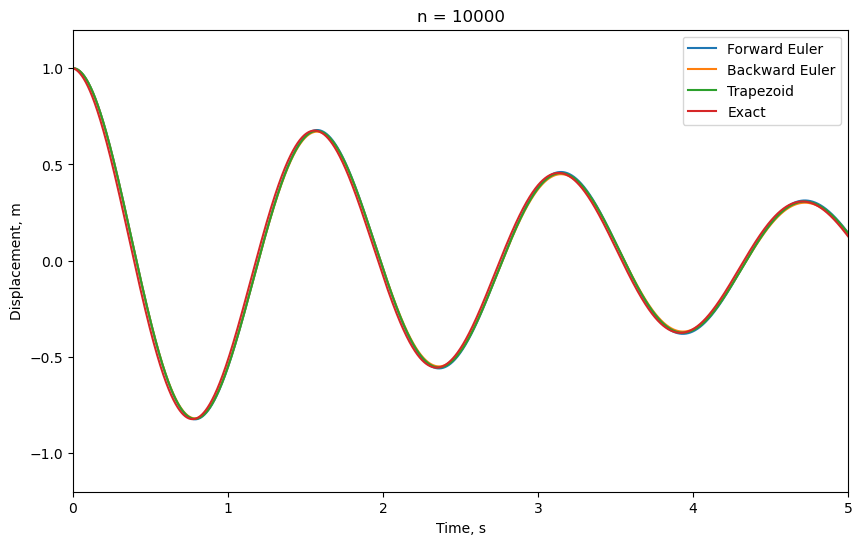

In [201]:
# TEST YOUR FUNCTION HERE
m = 1 # SOLUTION NO PROMPT
c = 0.5 # SOLUTION NO PROMPT
k = 16 # SOLUTION NO PROMPT
s0 = np.array([1,0]) # SOLUTION NO PROMPT
t_span = [0,5] # SOLUTION NO PROMPT
n = 10000 # SOLUTION NO PROMPT
q3_4 = my_msd_plot(t_span,n,s0,m,c,k) # SOLUTION

In [ ]:
grader.check("q3.4")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing the E7 Lab series!


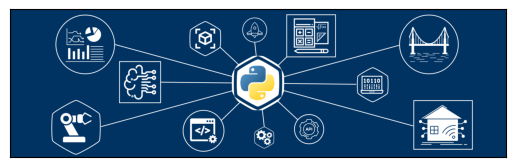

<IPython.core.display.Javascript object>

In [209]:
%matplotlib inline
import matplotlib.image as mpimg
from IPythonDisplayFireworks import Fireworks
from IPython.display import clear_output
img = mpimg.imread('resources/cover.png')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing the E7 Lab series!")
plt.show()
Fireworks(30)

from IPython.display import display, Javascript

# Define the JavaScript code to scroll to the section header
scroll_to_section_header_js = """
var section_header = document.getElementById('section_header');
if (section_header) {
    section_header.scrollIntoView({ behavior: 'smooth', block: 'start' });
} else {
    console.error('Section header not found.');
}
"""

# Execute the JavaScript code
display(Javascript(scroll_to_section_header_js))

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)